In [109]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

os.chdir('D:\\Users\\Gebruiker\\Desktop\\Anita\'s rotzooi\\Tilburg University\\Brainihacks\\Engagement Data')

In [146]:
data = pd.read_csv('AllData.csv')
#print(data.columns)
data = data.dropna()
data = data.loc[:, data.columns!='Unnamed: 0']
data = data.loc[:, data.columns!='Timestamp']

data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
0,2.0,8.755036,8.356174,0.368908,-3.002270,-1.470623,12.933638,14.674528,6.918777,0.411152,...,6.404797,7.171509,-1.750720,-3.266157,-0.576994,11.126944,9.307355,2.241517,-5.361687,-2.972842
1,2.0,5.475442,0.026379,1.547025,-3.251407,-7.513612,13.867902,9.514652,4.679568,-1.208829,...,2.997304,-0.812548,0.398677,-4.470396,-7.422709,7.228529,3.362044,1.831480,-2.025040,-6.667974
2,2.0,7.483816,5.432224,3.991340,-0.852330,-7.928528,9.171654,3.081106,-1.520891,1.430536,...,6.306486,3.026712,2.350238,-3.198835,-10.527682,5.582832,5.898288,-0.415406,-2.538356,-6.225558
3,2.0,3.788280,3.142704,5.357454,-3.125920,-8.418598,14.958658,-3.865107,-1.270962,-6.880674,...,-4.154253,1.719881,4.484347,-2.885985,-5.871274,2.695847,0.027494,2.288725,-1.293209,-6.439173
4,2.0,13.159506,6.951650,1.820282,0.610754,-4.038634,16.359430,7.333524,5.555811,1.069744,...,10.867407,6.503692,3.001653,-0.858176,-5.876140,8.031476,2.329094,2.424413,-1.034964,-5.401030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,7.0,11.586341,5.157209,1.065677,-1.330240,-4.148602,19.672706,8.575988,-0.063496,-2.378711,...,4.773320,0.103613,1.146601,0.018922,1.897509,13.311523,3.399435,0.759105,0.326330,-0.574893
34123,7.0,2.217390,-0.969838,-7.037413,-2.785163,-1.092282,5.634407,-1.794864,-0.752748,-1.134496,...,1.119300,-0.174167,-8.742986,-0.845129,0.615308,2.509049,-2.448023,-3.684307,0.681193,0.305190
34124,7.0,1.372737,0.432618,2.158286,-1.646520,-4.159025,10.055436,3.385120,-0.384305,-9.000250,...,0.751798,-1.373922,-1.069736,-6.371254,-1.892207,9.011200,3.311913,2.694148,2.156377,1.811708
34125,7.0,8.378012,5.396366,3.122233,1.540864,-2.186366,20.819564,17.821430,10.326110,0.690398,...,9.949835,2.207045,0.776558,1.410368,-3.118813,4.956218,3.376753,0.618586,0.496981,2.880997


In [112]:
high_relevant = ['FzGamma', 'F3Gamma', 'C3Gamma', 'C4Gamma', 'C4Delta', 'C4Gamma', 'F4Gamma',
               , 'P4Gamma']



In [147]:

channelPOz = ['POzAlpha', 'POzBeta','POzGamma','POzDelta' ,'POzTheta']
channelP3 = ['P3Alpha' ,'P3Beta' ,'P3Gamma','P3Delta','P3Theta']
channelP4 = ['P4Alpha' ,'P4Beta' ,'P4Gamma','P4Delta','P4Theta']
channelFz = ['FzAlpha' ,'FzBeta' ,'FzGamma','FzDelta','FzTheta']
channelF3 = ['F3Alpha' ,'F3Beta','F3Gamma','F3Delta','F3Theta']
channelF4 = ['F4Alpha' ,'F4Beta' ,'F4Gamma','F4Delta','F4Theta']
channelCz = ['CzAlpha', 'CzBeta','CzGamma','CzDelta','CzTheta']
channelC3 = ['C3Alpha','C3Beta','C3Gamma','C3Delta','C3Theta']
channelC4 = ['C4Alpha','C4Beta','C4Gamma','C4Delta','C4Theta']

alphanodes = ['POzAlpha','P3Alpha','P4Alpha','FzAlpha','F3Alpha','F4Alpha','CzAlpha','C3Alpha','C4Alpha']
betanodes = ['POzBeta','P3Beta','P4Beta','FzBeta','F3Beta','F4Beta','CzBeta','C3Beta','C4Beta']
gammanodes = ['POzGamma','P3Gamma','P4Gamma','FzGamma','F3Gamma','F4Gamma','CzGamma','C3Gamma','C4Gamma']
deltanodes = ['POzDelta','P3Delta','P4Delta','FzDelta','F3Delta','F4Delta','CzDelta','C3Delta','C4Delta']
thetanodes = ['POzTheta','P3Theta','P4Theta','FzTheta','F3Theta','F4Theta','CzTheta','C3Theta','C4Theta']



In [148]:
data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
0,2.0,8.755036,8.356174,0.368908,-3.002270,-1.470623,12.933638,14.674528,6.918777,0.411152,...,6.404797,7.171509,-1.750720,-3.266157,-0.576994,11.126944,9.307355,2.241517,-5.361687,-2.972842
1,2.0,5.475442,0.026379,1.547025,-3.251407,-7.513612,13.867902,9.514652,4.679568,-1.208829,...,2.997304,-0.812548,0.398677,-4.470396,-7.422709,7.228529,3.362044,1.831480,-2.025040,-6.667974
2,2.0,7.483816,5.432224,3.991340,-0.852330,-7.928528,9.171654,3.081106,-1.520891,1.430536,...,6.306486,3.026712,2.350238,-3.198835,-10.527682,5.582832,5.898288,-0.415406,-2.538356,-6.225558
3,2.0,3.788280,3.142704,5.357454,-3.125920,-8.418598,14.958658,-3.865107,-1.270962,-6.880674,...,-4.154253,1.719881,4.484347,-2.885985,-5.871274,2.695847,0.027494,2.288725,-1.293209,-6.439173
4,2.0,13.159506,6.951650,1.820282,0.610754,-4.038634,16.359430,7.333524,5.555811,1.069744,...,10.867407,6.503692,3.001653,-0.858176,-5.876140,8.031476,2.329094,2.424413,-1.034964,-5.401030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,7.0,11.586341,5.157209,1.065677,-1.330240,-4.148602,19.672706,8.575988,-0.063496,-2.378711,...,4.773320,0.103613,1.146601,0.018922,1.897509,13.311523,3.399435,0.759105,0.326330,-0.574893
34123,7.0,2.217390,-0.969838,-7.037413,-2.785163,-1.092282,5.634407,-1.794864,-0.752748,-1.134496,...,1.119300,-0.174167,-8.742986,-0.845129,0.615308,2.509049,-2.448023,-3.684307,0.681193,0.305190
34124,7.0,1.372737,0.432618,2.158286,-1.646520,-4.159025,10.055436,3.385120,-0.384305,-9.000250,...,0.751798,-1.373922,-1.069736,-6.371254,-1.892207,9.011200,3.311913,2.694148,2.156377,1.811708
34125,7.0,8.378012,5.396366,3.122233,1.540864,-2.186366,20.819564,17.821430,10.326110,0.690398,...,9.949835,2.207045,0.776558,1.410368,-3.118813,4.956218,3.376753,0.618586,0.496981,2.880997


In [149]:
#Scale by channel

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
#data['target'] = LabelBinarizer().fit_transform(data.target)

#scaler = MinMaxScaler().fit(data.loc[:, data.columns!='target'])

scalePOz = MinMaxScaler().fit(data[channelPOz])
scaleP3 = MinMaxScaler().fit(data[channelP3])
scaleP4 = MinMaxScaler().fit(data[channelP4])
scaleFz = MinMaxScaler().fit(data[channelFz])
scaleF3 = MinMaxScaler().fit(data[channelF3])
scaleF4 = MinMaxScaler().fit(data[channelF4])
scaleCz = MinMaxScaler().fit(data[channelCz])
scaleC3 = MinMaxScaler().fit(data[channelC3])
scaleC4 = MinMaxScaler().fit(data[channelC4])

data[channelPOz] = scalePOz.transform(data[channelPOz])
data[channelP3] = scaleP3.transform(data[channelP3])
data[channelP4] = scaleP4.transform(data[channelP4])
data[channelFz] = scaleFz.transform(data[channelFz])
data[channelF3] = scaleF3.transform(data[channelF3])
data[channelF4] = scaleF4.transform(data[channelF4])
data[channelCz] = scaleCz.transform(data[channelCz])
data[channelC3] = scaleC3.transform(data[channelC3])
data[channelC4] = scaleC4.transform(data[channelC4])

In [150]:
data #0 is low engagement, 1 is high engagement

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
0,2.0,0.692921,0.831317,0.766552,0.809572,0.838154,0.703573,0.870933,0.860631,0.850089,...,0.655508,0.819400,0.740182,0.784099,0.814672,0.707251,0.833892,0.781773,0.748021,0.768742
1,2.0,0.647445,0.737690,0.777852,0.806980,0.770937,0.718626,0.812762,0.839435,0.833546,...,0.607425,0.729545,0.763364,0.770623,0.742352,0.649804,0.763897,0.776891,0.788462,0.726739
2,2.0,0.675294,0.798452,0.801296,0.831941,0.766322,0.642959,0.740232,0.780745,0.860499,...,0.654121,0.772753,0.784413,0.784852,0.709551,0.625553,0.793756,0.750139,0.782240,0.731768
3,2.0,0.624050,0.772717,0.814399,0.808285,0.760871,0.736200,0.661922,0.783111,0.775625,...,0.506509,0.758046,0.807431,0.788353,0.758742,0.583010,0.724639,0.782335,0.797332,0.729339
4,2.0,0.753996,0.815530,0.780473,0.847163,0.809590,0.758770,0.788173,0.847729,0.856814,...,0.718480,0.811884,0.791439,0.811046,0.758691,0.661636,0.751736,0.783950,0.800462,0.741140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,7.0,0.732182,0.795361,0.773235,0.826968,0.808366,0.812154,0.802180,0.794540,0.821599,...,0.632486,0.739856,0.771431,0.820861,0.840814,0.739444,0.764337,0.764123,0.816961,0.796000
34123,7.0,0.602267,0.726492,0.695517,0.811831,0.842362,0.585967,0.685262,0.788016,0.834305,...,0.580924,0.736730,0.664766,0.811192,0.827268,0.580257,0.695494,0.711218,0.821262,0.806004
34124,7.0,0.590554,0.742256,0.783715,0.823678,0.808250,0.657199,0.743659,0.791503,0.753980,...,0.575738,0.723227,0.747527,0.749351,0.800778,0.676073,0.763307,0.787162,0.839142,0.823129
34125,7.0,0.687693,0.798049,0.792960,0.856840,0.830192,0.830632,0.906411,0.892883,0.852940,...,0.705532,0.763528,0.767440,0.836433,0.787820,0.616319,0.764070,0.762450,0.819030,0.835284


In [151]:
#Scale by frequency
from sklearn.preprocessing import MinMaxScaler


scaleAlpha = MinMaxScaler().fit(data[alphanodes])
scaleBeta = MinMaxScaler().fit(data[betanodes])
scaleGamma = MinMaxScaler().fit(data[gammanodes])
scaleDelta = MinMaxScaler().fit(data[deltanodes])
scaleTheta = MinMaxScaler().fit(data[thetanodes])

data[alphanodes] = scaleAlpha.transform(data[alphanodes])
data[betanodes] = scaleBeta.transform(data[betanodes])
data[gammanodes] = scaleGamma.transform(data[gammanodes])
data[deltanodes] = scaleDelta.transform(data[deltanodes])
data[thetanodes] = scaleTheta.transform(data[thetanodes])

data

,target,POzDelta,POzTheta,POzAlpha,POzBeta,POzGamma,FzDelta,FzTheta,FzAlpha,FzBeta,...,P3Delta,P3Theta,P3Alpha,P3Beta,P3Gamma,P4Delta,P4Theta,P4Alpha,P4Beta,P4Gamma
0,2.0,0.692921,0.831317,0.766552,0.809572,0.838154,0.703573,0.870933,0.860631,0.850089,...,0.655508,0.819400,0.740182,0.784099,0.814672,0.707251,0.833892,0.781773,0.748021,0.768742
1,2.0,0.647445,0.737690,0.777852,0.806980,0.770937,0.718626,0.812762,0.839435,0.833546,...,0.607425,0.729545,0.763364,0.770623,0.742352,0.649804,0.763897,0.776891,0.788462,0.726739
2,2.0,0.675294,0.798452,0.801296,0.831941,0.766322,0.642959,0.740232,0.780745,0.860499,...,0.654121,0.772753,0.784413,0.784852,0.709551,0.625553,0.793756,0.750139,0.782240,0.731768
3,2.0,0.624050,0.772717,0.814399,0.808285,0.760871,0.736200,0.661922,0.783111,0.775625,...,0.506509,0.758046,0.807431,0.788353,0.758742,0.583010,0.724639,0.782335,0.797332,0.729339
4,2.0,0.753996,0.815530,0.780473,0.847163,0.809590,0.758770,0.788173,0.847729,0.856814,...,0.718480,0.811884,0.791439,0.811046,0.758691,0.661636,0.751736,0.783950,0.800462,0.741140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,7.0,0.732182,0.795361,0.773235,0.826968,0.808366,0.812154,0.802180,0.794540,0.821599,...,0.632486,0.739856,0.771431,0.820861,0.840814,0.739444,0.764337,0.764123,0.816961,0.796000
34123,7.0,0.602267,0.726492,0.695517,0.811831,0.842362,0.585967,0.685262,0.788016,0.834305,...,0.580924,0.736730,0.664766,0.811192,0.827268,0.580257,0.695494,0.711218,0.821262,0.806004
34124,7.0,0.590554,0.742256,0.783715,0.823678,0.808250,0.657199,0.743659,0.791503,0.753980,...,0.575738,0.723227,0.747527,0.749351,0.800778,0.676073,0.763307,0.787162,0.839142,0.823129
34125,7.0,0.687693,0.798049,0.792960,0.856840,0.830192,0.830632,0.906411,0.892883,0.852940,...,0.705532,0.763528,0.767440,0.836433,0.787820,0.616319,0.764070,0.762450,0.819030,0.835284


In [136]:
#if only one frequency

#data['target'] = LabelBinarizer().fit_transform(data.target)

scaler = MinMaxScaler().fit(data.loc[:, data.columns!='target'])

data.loc[:, data.columns!='target'] = scaler.transform(data.loc[:, data.columns!='target'])
data


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,target,P3Gamma,P4Gamma,FzGamma,F3Gamma,F4Gamma,C3Gamma,C4Gamma
0,2.0,0.814672,0.768742,0.786197,0.844828,0.839763,0.867711,0.776845
1,2.0,0.742352,0.726739,0.798792,0.839895,0.835374,0.804577,0.785840
2,2.0,0.709551,0.731768,0.763472,0.824192,0.837185,0.777547,0.763170
3,2.0,0.758742,0.729339,0.764828,0.828004,0.800768,0.794282,0.764083
4,2.0,0.758691,0.741140,0.768348,0.780771,0.837159,0.793423,0.795243
...,...,...,...,...,...,...,...,...
34122,7.0,0.840814,0.796000,0.803392,0.807485,0.802257,0.903821,0.819907
34123,7.0,0.827268,0.806004,0.849006,0.855968,0.832747,0.861773,0.902785
34124,7.0,0.800778,0.823129,0.817789,0.817815,0.802364,0.857060,0.860307
34125,7.0,0.787820,0.835284,0.835703,0.826002,0.815192,0.864193,0.881992


In [152]:
from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(data.loc[:, data.columns!='target'], #feature columns
                                                                            data["target"], #target labels
                                                                            test_size=0.25, #train/test ratio
                                                                           # random_state=99 #random seed
                                                                            )

In [153]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

model1 = DecisionTreeClassifier(max_depth = 6)
#model2 = SVC(kernel = 'rbf', probability = True)
#model3 = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(5,5), max_iter = 1000)
#model4 = GradientBoostingClassifier(n_estimators=1000, subsample=1, learning_rate=1e-5)
#model5 =  LogisticRegression(C=1)
#model6 = RandomForestClassifier(n_estimators=500, max_depth = 6)
#model7= KNeighborsClassifier(n_neighbors=5)

model1.fit(features_train,target_train)
#model2.fit(features_train,target_train)
#model3.fit(features_train, target_train)
#model4.fit(features_train, target_train)
#model5.fit(features_train, target_train)
#model6.fit(features_train, target_train)
#model7.fit(features_train, target_train)


pred1=model1.predict(features_test)
#pred2=model2.predict(features_test)
#pred3=model3.predict(features_test)
#pred4=model4.predict(features_test)
#pred5=model5.predict(features_test)
#pred6=model6.predict(features_test)
#pred7=model7.predict(features_test)


final_pred = np.array([])
for i in range(0,len(features_test)):
    m = stats.mode([pred1[i]])
    final_pred = np.append(final_pred, m[0])

print("Accuracy: ", np.mean(final_pred - target_test == 0))


Accuracy:  0.40189873417721517


In [145]:
print('Decision Tree')
print("Accuracy on training set: {:.3f}".format(model1.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model1.score(features_test, target_test)))
DTScores = cross_val_score(model1, features_train, target_train, cv= 3)
print(DTScores)
print(f"Decision Treet mean 5-fold Cross-Validation score: {np.mean(DTScores):.3f}")
print('\n')

Decision Tree


ValueError: X has 45 features, but DecisionTreeClassifier is expecting 7 features as input.

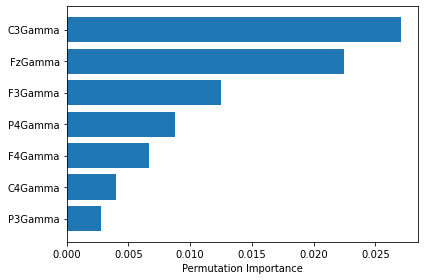

In [140]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


perm_importance = permutation_importance(model1, features_test, target_test, n_repeats = 1)

feature_names = list(features_train.columns)
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

plt.tight_layout()
plt.savefig('PermutationImportanceScaled.png', dpi = 300)

In [105]:

import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

import shap
shap.initjs()
explainer = shap.Explainer(model1.predict, features_train)
shap_values = explainer(features_train)

#from sklearn_rvm import EMRVR
#model_rvr=EMRVR(kernel="linear").fit(features_train, target_train)
#explainer = shap.KernelExplainer(model_rvr.predict, features_train)

Permutation explainer: 25596it [24:04, 17.63it/s]                                                                      


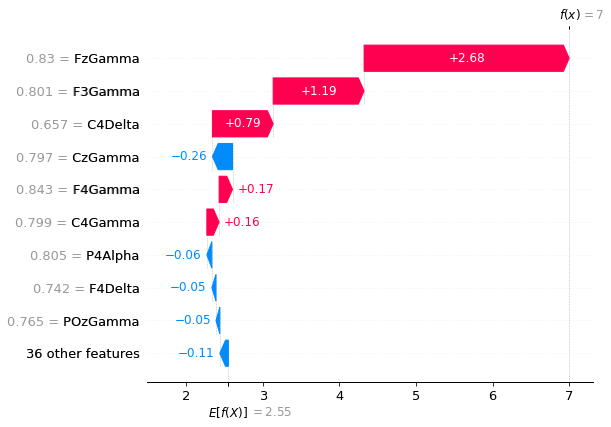

In [106]:
import matplotlib.pyplot as plt
shap.plots.waterfall(shap_values[0], show = False)
plt.savefig('ShapWaterfall.png', dpi = 300, bbox_inches='tight')
plt.show()

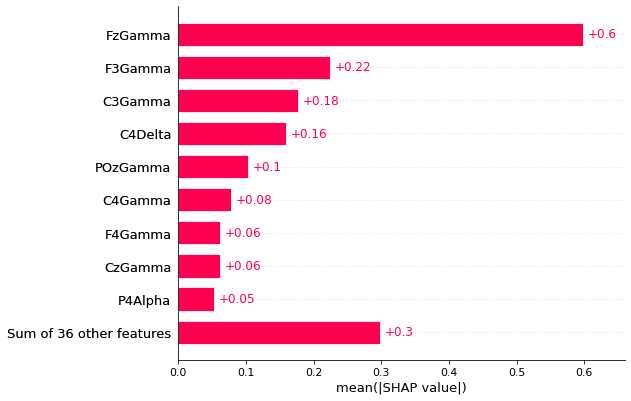

In [107]:
shap.plots.bar(shap_values, show = False)
plt.savefig('ShapBarplot.png', dpi = 300, bbox_inches='tight')
plt.show()

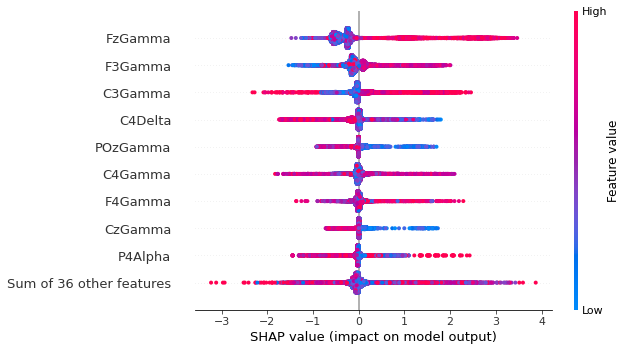

In [108]:
shap.plots.beeswarm(shap_values, show = False)
plt.savefig('ShapBees.png', dpi = 300, bbox_inches='tight')
plt.show()

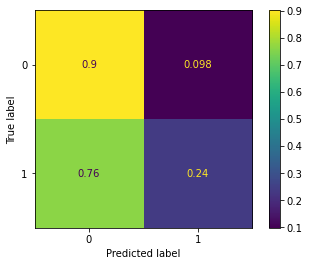

In [132]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, features_test, target_test, normalize = 'true') 

plt.grid(False)
plt.savefig('ConfusionGamma.png', dpi = 300)
plt.show()


In [31]:
print('Decision Tree')
print("Accuracy on training set: {:.3f}".format(model1.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model1.score(features_test, target_test)))
DTScores = cross_val_score(model1, features_train, target_train, cv= 3)
print(DTScores)
print(f"Decision Treet mean 5-fold Cross-Validation score: {np.mean(DTScores):.3f}")
print('\n')


print('SVC')
print("Accuracy on training set: {:.3f}".format(model2.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model2.score(features_test, target_test)))
SVCScores = cross_val_score(model2, features_train, target_train, cv= 3)
print(SVCScores)
print(f"SVC mean 5-fold Cross-Validation score: {np.mean(SVCScores):.3f}")
print('\n')


print('MLP')
print("Accuracy on training set: {:.3f}".format(model3.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model3.score(features_test, target_test)))
MLPScores = cross_val_score(model3, features_train, target_train, cv= 3)
print(MLPScores)
print(f"MLP mean 5-fold Cross-Validation score: {np.mean(MLPScores):.3f}")
print('\n')


print('GBC')
print("Accuracy on training set: {:.3f}".format(model4.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model4.score(features_test, target_test)))
GBCScores = cross_val_score(model4, features_train, target_train, cv= 3)
print(GBCScores)
print(f"GBC mean 5-fold Cross-Validation score: {np.mean(GBCScores):.3f}")
print('\n')


print('Logistic Regression')
print("Accuracy on training set: {:.3f}".format(model5.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model5.score(features_test, target_test)))
print('\n')
LRScores = cross_val_score(model5, features_train, target_train, cv =3)
print(LRScores)
print(f"Logistic Regression mean 5-fold Cross-Validation score: {np.mean(LRScores):.3f}")
print('\n')

print('Random Forest')
print("Accuracy on training set: {:.3f}".format(model6.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model6.score(features_test, target_test)))
RFScores = cross_val_score(model6, features_train, target_train, cv=3)
print(RFScores)
print(f"Random Forest mean 5-fold Cross-Validation score: {np.mean(RFScores):.3f}")
print('\n')


print('KNN')
print("Accuracy on training set: {:.3f}".format(model7.score(features_train, target_train)))
print("Accuracy on test set: {:.3f}".format(model7.score(features_test, target_test)))
KNNScores = cross_val_score(model7, features_train, target_train, cv= 3)
print(KNNScores)
print(f"KNN mean 5-fold Cross-Validation score: {np.mean(KNNScores):.3f}")
print('\n')


Decision Tree
Accuracy on training set: 0.656
Accuracy on test set: 0.645
[0.64896859 0.63326301 0.64716915]
Decision Treet mean 5-fold Cross-Validation score: 0.643


SVC


AttributeError: 'SVC' object has no attribute 'shape_fit_'

C3Gamma                   0.048
POzAlpha                  0.014
POzTheta                  0.000
POzGamma                  0.000
POzDelta                  0.000
POzBeta                   0.000
P4Theta                   0.000
P4Gamma                   0.000
P4Delta                   0.000
P4Beta                    0.000
P4Alpha                   0.000
P3Theta                   0.000
P3Gamma                   0.000
P3Delta                   0.000
P3Beta                    0.000
P3Alpha                   0.000
FzTheta                   0.000
FzGamma                   0.000
FzDelta                   0.000
FzBeta                    0.000
FzAlpha                   0.000
F4Theta                   0.000
F4Gamma                   0.000
F4Delta                   0.000
F4Beta                    0.000
F4Alpha                   0.000
F3Theta                   0.000
F3Gamma                   0.000
F3Delta                   0.000
F3Beta                    0.000
F3Alpha                   0.000
CzTheta 

In [19]:
## Random Forest


Accuracy on training set: 0.602
Accuracy on test set: 0.600


POzDelta                  0.626
CzDelta                   0.037
F3Delta                   0.033
C4Delta                   0.033
FzDelta                   0.025
C3Delta                   0.024
P4Delta                   0.022
F4Delta                   0.018
F4Alpha                   0.017
F4Theta                   0.016
P3Delta                   0.012
FzGamma                   0.012
F3Alpha                   0.009
C4Theta                   0.009
POzBeta                   0.008
F3Gamma                   0.006
CzGamma                   0.006
P4Beta                    0.006
P3Beta                    0.005
C4Alpha                   0.005
P3Gamma                   0.005
C3Gamma                   0.004
P3Theta                   0.004
POzGamma                  0.004
P4Theta                   0.004
F3Theta                   0.004
F4Gamma                   0.004
P4Alpha                   0.004
P4Gamma                   0.004
F4Beta                    0.003
CzBeta                    0.003
C4Gamma 

In [28]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


perm_importance = permutation_importance(rf, features_test, target_test, n_repeats = 30)

feature_names = list(features_train.columns)
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

plt.tight_layout()
plt.savefig('PermutationImportanceEnsemble.png', dpi = 300)

KeyboardInterrupt: 

Feature: 0, Score: 7.18397
Feature: 1, Score: -0.58334
Feature: 2, Score: -1.82796
Feature: 3, Score: -5.22998
Feature: 4, Score: -2.01787
Feature: 5, Score: -1.51095
Feature: 6, Score: -0.48181
Feature: 7, Score: -0.73425
Feature: 8, Score: 0.60320
Feature: 9, Score: 2.80587
Feature: 10, Score: 9.18173
Feature: 11, Score: 0.57083
Feature: 12, Score: 0.57821
Feature: 13, Score: 0.80073
Feature: 14, Score: 3.51832
Feature: 15, Score: -0.13344
Feature: 16, Score: 0.66199
Feature: 17, Score: 1.15733
Feature: 18, Score: -1.23336
Feature: 19, Score: -3.56314
Feature: 20, Score: -4.21619
Feature: 21, Score: -0.10243
Feature: 22, Score: -0.41762
Feature: 23, Score: -0.28116
Feature: 24, Score: 0.29199
Feature: 25, Score: -1.31593
Feature: 26, Score: -0.03240
Feature: 27, Score: 1.23506
Feature: 28, Score: -1.50039
Feature: 29, Score: 0.03962
Feature: 30, Score: -3.86701
Feature: 31, Score: -1.11999
Feature: 32, Score: -0.40292
Feature: 33, Score: -2.40957
Feature: 34, Score: 0.10409
Feature: 

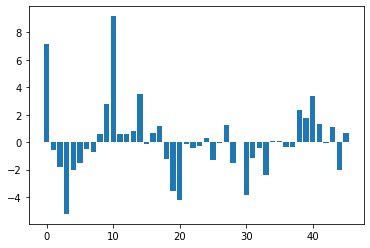

In [26]:

# linear regression feature importance
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
#features_train, target_train = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(features_train, target_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()